In [0]:
from dataloader import CartpoleDataset
from cartpolenet2 import CartPoleNet
import torch
import torch
import torch.nn as nn
import torch.nn.functional as F 
import torch.optim as optim
import matplotlib.pyplot as plt

In [0]:
path = 'drive/My Drive/image_dataset/'
dataset = CartpoleDataset('data.csv', path, 5, H=128, W=128)

In [3]:
net = CartPoleNet().double()
print(net)

CartPoleNet(
  (conv1): Conv3d(1, 6, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
  (conv2): Conv3d(6, 16, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
  (conv3): Conv3d(16, 32, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
  (conv4): Conv3d(32, 64, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
  (fc1): Linear(in_features=4096, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=100, bias=True)
  (fc3): Linear(in_features=100, out_features=50, bias=True)
  (fc4): Linear(in_features=50, out_features=4, bias=True)
)


In [0]:
JHist = [] # cost history
LR = [] # learning rate
JHist_test = [] # test it on one batch only 
epoch = 0
index = 3

In [0]:
lr = 0.005
optimizer = optim.SGD(net.parameters(), lr=lr)
criterion = nn.MSELoss()
LR.append(lr)
for i in range(50): # num_epochs
  train_x, train_y, epoch, index = create_batch(dataset, 64, epoch, index)
  optimizer.zero_grad()
  y_pred = net(train_x)
  loss = criterion(y_pred, train_y)
  loss.backward()
  optimizer.step()
  JHist.append(loss.item())

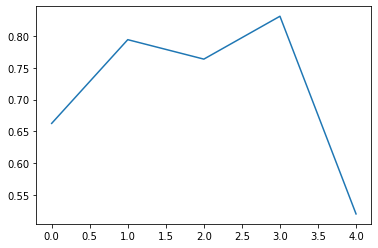

In [17]:
plt.plot(JHist)

In [0]:
def create_batch(dataset, batch_size=32, epoch=0, index=0):
  '''
  retrieves a batch of training data to work on. given the specified
  starting epoch and starting index. 
  '''
  index %= 50
  assert(epoch < 220 and epoch >= 0)
  assert(index >= 3 and index <= 48)

  train_x = dataset[epoch * 50 + index][0].unsqueeze(0) # gets first training point 
  train_y = torch.tensor(dataset[epoch * 50 + index][1][-2, :]).unsqueeze(0) # gets second to last delta state 

  # epoch * 50 + index


  for i in range(batch_size - 1):
    index += 1
    if (index > 48):
      # resetting indices so we are in the right area
      epoch += 1
      index = 3 
    x = dataset[epoch * 50 + index][0].unsqueeze(0)
    y = torch.tensor(dataset[epoch * 50 + index][1][-2, :]).unsqueeze(0)
    train_x = torch.cat((train_x, x), axis=0)
    train_y = torch.cat((train_y, y), axis=0)

  return (train_x.double(), train_y, epoch, index)

